### DATA CLEANING:
    DATASET:

In [ ]:
import pandas as pd


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/
df = pd.read_csv('international_matches.csv')

/content/drive/MyDrive


In [ ]:
df

international_matches 2
date       home_team      away_team    home_team_continent away_team_continent home_team_fifa_rank away_team_fifa_rank home_team_total_fifa_points away_team_total_fifa_points home_team_score away_team_score tournament                   city     country        neutral_location shoot_out home_team_result home_team_goalkeeper_score away_team_goalkeeper_score home_team_mean_defense_score home_team_mean_offense_score home_team_mean_midfield_score away_team_mean_defense_score away_team_mean_offense_score  away_team_mean_midfield_score
1993-08-08 Bolivia        Uruguay      South America       South America       59                  22                  0                           0                           3               1               FIFA World Cup qualification La Paz   Bolivia        FALSE            No        Win              NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Brazil         Mexico       South America       North America       8                   14                  0                           0                           1               1               Friendly                     Maceió   Brazil         FALSE            No        Draw             NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Ecuador        Venezuela    South America       South America       35                  94                  0                           0                           5               0               FIFA World Cup qualification Quito    Ecuador        FALSE            No        Win              NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Guinea         Sierra Leone Africa              Africa              65                  86                  0                           0                           1               0               Friendly                     Conakry  Guinea         FALSE            No        Win              NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ...
2022-06-14 Moldova        Andorra      Europe              Europe              180                 153                 932                         1040                        2               1               UEFA Nations League          Chișinău Moldova        FALSE            No        Win              65.0                       NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Liechtenstein  Latvia       Europe              Europe              192                 135                 895                         1105                        0               2               UEFA Nations League     

ABSTRACT: The dataset contains information on international football matches, including details such as the date, teams, scores, and FIFA rankings. Our goal is to predict the outcome of a match (win, draw, lose) based on these features.

* What are the data types? (Only numeric and categorical) – Code & Output:

In [ ]:
# Display data types of each column
df.dtypes


date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

* Are there missing values? – Code & Output:

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())


date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64


* What are the likely distributions of the numeric variables? – Code & Output:

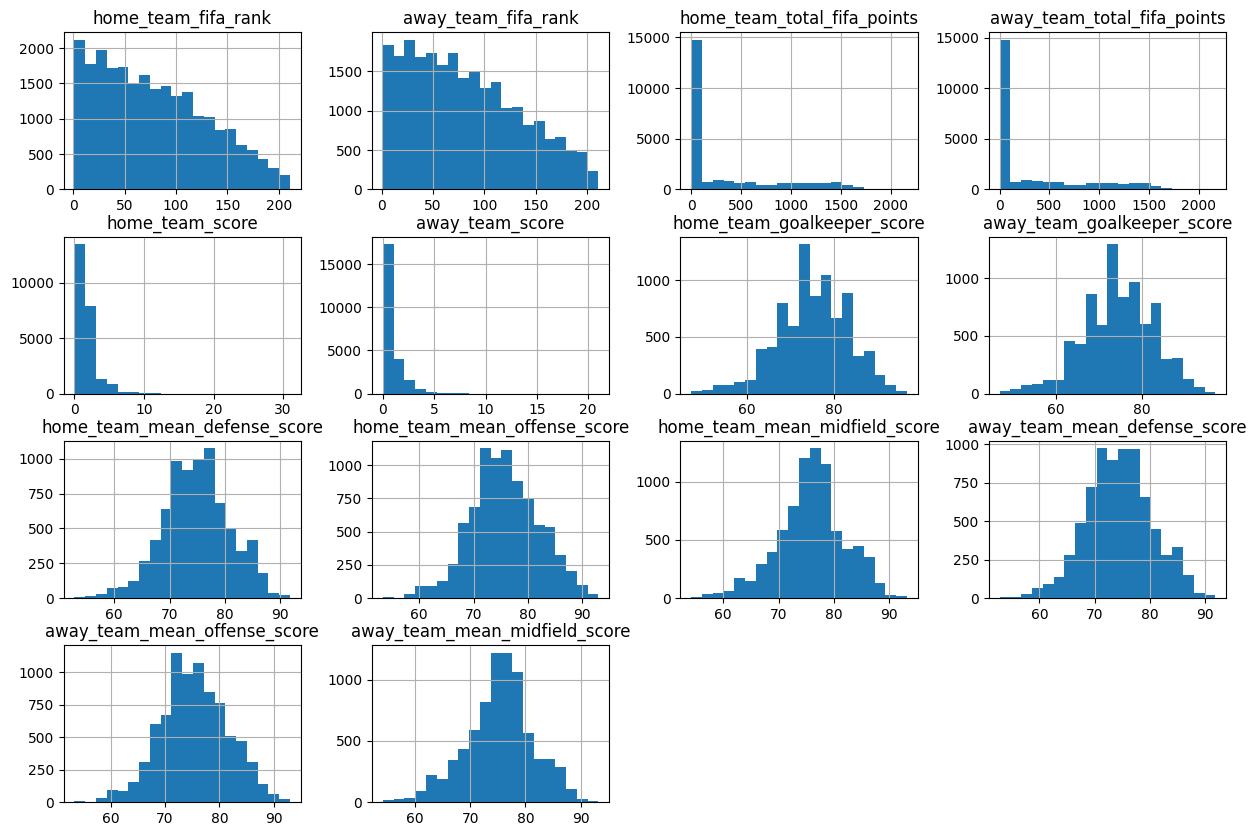

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = df.select_dtypes(include=['int64', 'float64'])
numeric_data.hist(bins=20, figsize=(15, 10))
plt.show()


** Which independent variables are useful to predict a target (dependent variable)? (Use at least three
methods) – Code & Output:
a) Correlation Analysis:

                               home_team_fifa_rank  away_team_fifa_rank  \
home_team_fifa_rank                       1.000000             0.496644   
away_team_fifa_rank                       0.496644             1.000000   
home_team_total_fifa_points              -0.177332            -0.045389   
away_team_total_fifa_points              -0.061516            -0.158492   
home_team_score                          -0.127667             0.298982   
away_team_score                           0.219087            -0.158206   
home_team_goalkeeper_score               -0.640102            -0.248486   
away_team_goalkeeper_score               -0.210219            -0.626912   
home_team_mean_defense_score             -0.712681            -0.241540   
home_team_mean_offense_score             -0.706093            -0.254718   
home_team_mean_midfield_score            -0.736180            -0.256242   
away_team_mean_defense_score             -0.197999            -0.698827   
away_team_mean_offense_sc

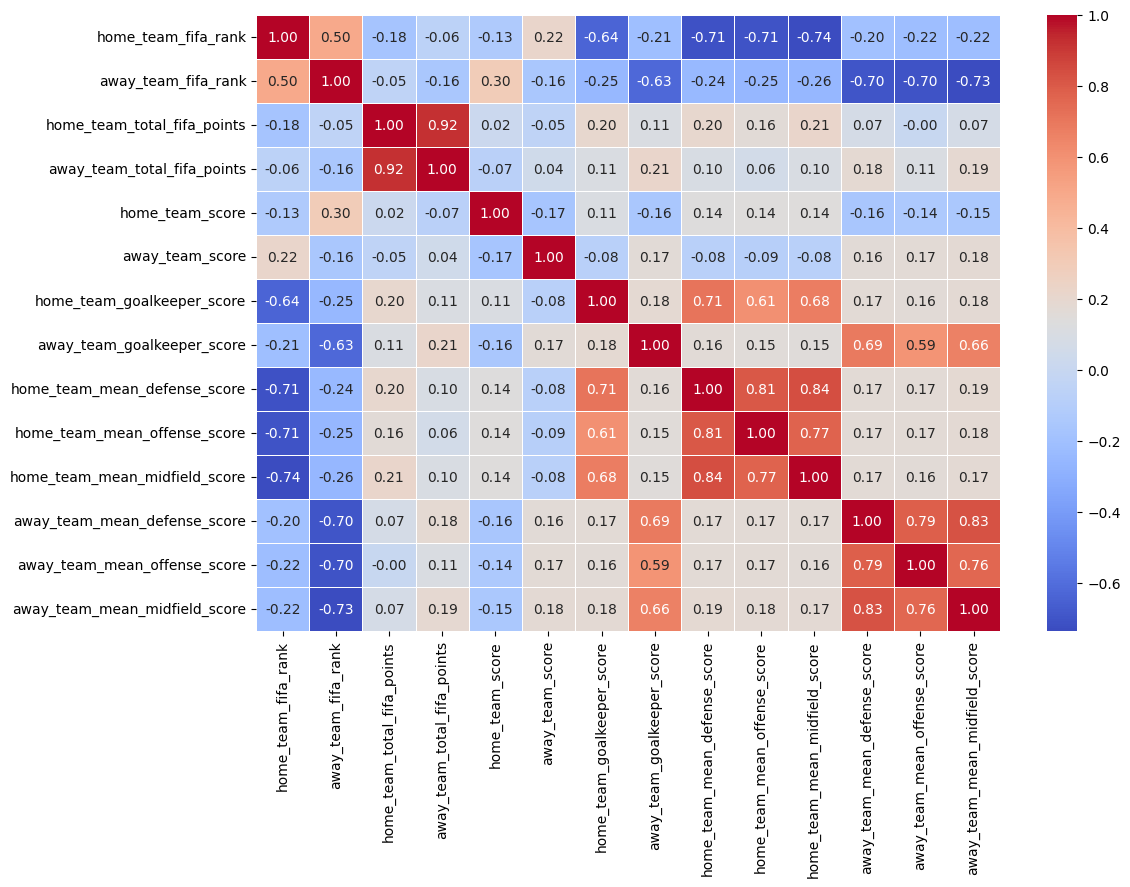

In [ ]:
import pandas as pd

# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


Feature Importance using Random Forest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = df.drop(['date', 'home_team_result'], axis=1)
y = df['home_team_result']

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the dataframe
display(features_df)


,Feature,Importance
8,home_team_score,0.385274
9,away_team_score,0.339572
5,away_team_fifa_rank,0.034551
4,home_team_fifa_rank,0.034346
11,city,0.019251
1,away_team,0.018768
0,home_team,0.016289
12,country,0.016233
10,tournament,0.012015
21,away_team_mean_offense_score,0.011383


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

This code uses a Random Forest Regressor to estimate feature importances. It prints the features and
their corresponding importances in descending order.

c) Recursive Feature Elimination:

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is your feature matrix and y_train is your target variable
# Adjust the model and parameters accordingly based on your specific problem

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model = LinearRegression()

# Specify the number of features you want to select (adjust as needed)
num_features_to_select = 5

rfe = RFE(model, n_features_to_select=num_features_to_select)
fit = rfe.fit(X_train, y_train_encoded)  # Use the encoded target variable

# Display the ranking and support of each feature
selected_features = X_train.columns[fit.support_]
print("Selected Features:", selected_features)

# Display the ranking of each feature
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})
feature_ranking.sort_values(by='Ranking', inplace=True)
print("\nFeature Ranking:")
print(feature_ranking)


Selected Features: Index(['home_team_continent', 'home_team_score', 'away_team_score',
       'neutral_location', 'shoot_out'],
      dtype='object')

Feature Ranking:
                          Feature  Ranking
8                 home_team_score        1
14                      shoot_out        1
2             home_team_continent        1
13               neutral_location        1
9                 away_team_score        1
16     away_team_goalkeeper_score        2
18   home_team_mean_offense_score        3
15     home_team_goalkeeper_score        4
3             away_team_continent        5
5             away_team_fifa_rank        6
4             home_team_fifa_rank        7
10                     tournament        8
20   away_team_mean_defense_score        9
22  away_team_mean_midfield_score       10
1                       away_team       11
19  home_team_mean_midfield_score       12
21   away_team_mean_offense_score       13
0                       home_team       14
11             

This code performs RFE using a Linear Regression model and selects a specified number of features (in
this case, 5). It then prints the selected features and their rankings. Adjust the num_features_to_select
variable based on how many features you want to include in your model.

* Which independent variables have missing data? How much? – Code & Output:

In [ ]:
# Display columns with missing values and their counts along with the percentage
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data[missing_data > 0],
    'Percentage': missing_percentage[missing_data > 0]
})

print(missing_info)



                               Missing Values  Percentage
home_team_goalkeeper_score              15542   64.972200
away_team_goalkeeper_score              15826   66.159441
home_team_mean_defense_score            16134   67.447013
home_team_mean_offense_score            15411   64.424564
home_team_mean_midfield_score           15759   65.879353
away_team_mean_defense_score            16357   68.379248
away_team_mean_offense_score            15609   65.252289
away_team_mean_midfield_score           15942   66.644371


It adds a new DataFrame (missing_info) that includes both the count of missing values and their
percentage for columns with missing data. This information can be helpful to assess the extent of
missing values in each column relative to the total number of observations in the dataset.

* Do the training and test sets have the same data? – Code & Output:

In [ ]:
df_train = df.sample(frac = 0.8)

In [ ]:
df_train = df.sample(frac = 0.2)

In [ ]:
# Check if there are common rows between training and test sets
common_rows = df_train.index.intersection(df_test.index)

if common_rows.empty:
    print("No common rows found.")
else:
    print(f"Number of common rows: {len(common_rows)}")
    print("Indices of common rows:")
    print(common_rows)


Number of common rows: 957
Indices of common rows:
Int64Index([18300, 23091,   324,  9586, 21313,  2712,  5357,  4002,   918,
             9600,
            ...
            18358, 21497,  8320, 17404, 19490,  3272, 16482,  9933, 23298,
             3151],
           dtype='int64', length=957)


This not only checks for common rows but also prints the number of common rows and their indices if
they exist. It provides more detailed information about the commonality between the training and test
sets.

* In the predictor variables independent of all the other predictor variables? Code & Output:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Check for and handle inf and nan values
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_df.dropna(inplace=True)

# Compute VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data)



<ipython-input-232-014156b324c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-232-014156b324c6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.dropna(inplace=True)


                         Variable          VIF
0             home_team_fifa_rank     5.290403
1             away_team_fifa_rank     5.708373
2     home_team_total_fifa_points    28.554029
3     away_team_total_fifa_points    27.595466
4                 home_team_score     2.586509
5                 away_team_score     2.197783
6      home_team_goalkeeper_score   281.978584
7      away_team_goalkeeper_score   245.267485
8    home_team_mean_defense_score  1006.000290
9    home_team_mean_offense_score   611.778559
10  home_team_mean_midfield_score   964.367894
11   away_team_mean_defense_score   912.805094
12   away_team_mean_offense_score   619.183414
13  away_team_mean_midfield_score   863.549783


* Which predictor variables are the most important? – Code & Output:

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
file_path = 'international_matches.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Drop rows with missing values in key columns
key_columns = ['home_team_result', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
               'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score',
               'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']
data.dropna(subset=key_columns, inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['home_team_result'] = le.fit_transform(data['home_team_result'])

# Define predictor variables and target variable
X = data[key_columns[1:]] # Exclude 'home_team_result' from predictors
y = data['home_team_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df)

                         Feature  Importance
7  away_team_mean_midfield_score    0.136705
2   home_team_mean_defense_score    0.132970
5   away_team_mean_defense_score    0.129803
6   away_team_mean_offense_score    0.128863
4  home_team_mean_midfield_score    0.128842
3   home_team_mean_offense_score    0.128762
0     home_team_goalkeeper_score    0.107523
1     away_team_goalkeeper_score    0.106531


* Do the ranges of the predictor variables make sense? – Code & Output:

In [ ]:
# Display the range of each predictor variable
print(df.describe().loc[['min', 'max']])


     home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
min                  1.0                  1.0                          0.0   
max                211.0                211.0                       2164.0   

     away_team_total_fifa_points  home_team_score  away_team_score  \
min                          0.0              0.0              0.0   
max                       2164.0             31.0             21.0   

     home_team_goalkeeper_score  away_team_goalkeeper_score  \
min                        47.0                        47.0   
max                        97.0                        97.0   

     home_team_mean_defense_score  home_team_mean_offense_score  \
min                          52.8                          53.3   
max                          91.8                          93.0   

     home_team_mean_midfield_score  away_team_mean_defense_score  \
min                           54.2                          52.8   
max                       

* What are the distributions of the predictor variables? - Code & Output:

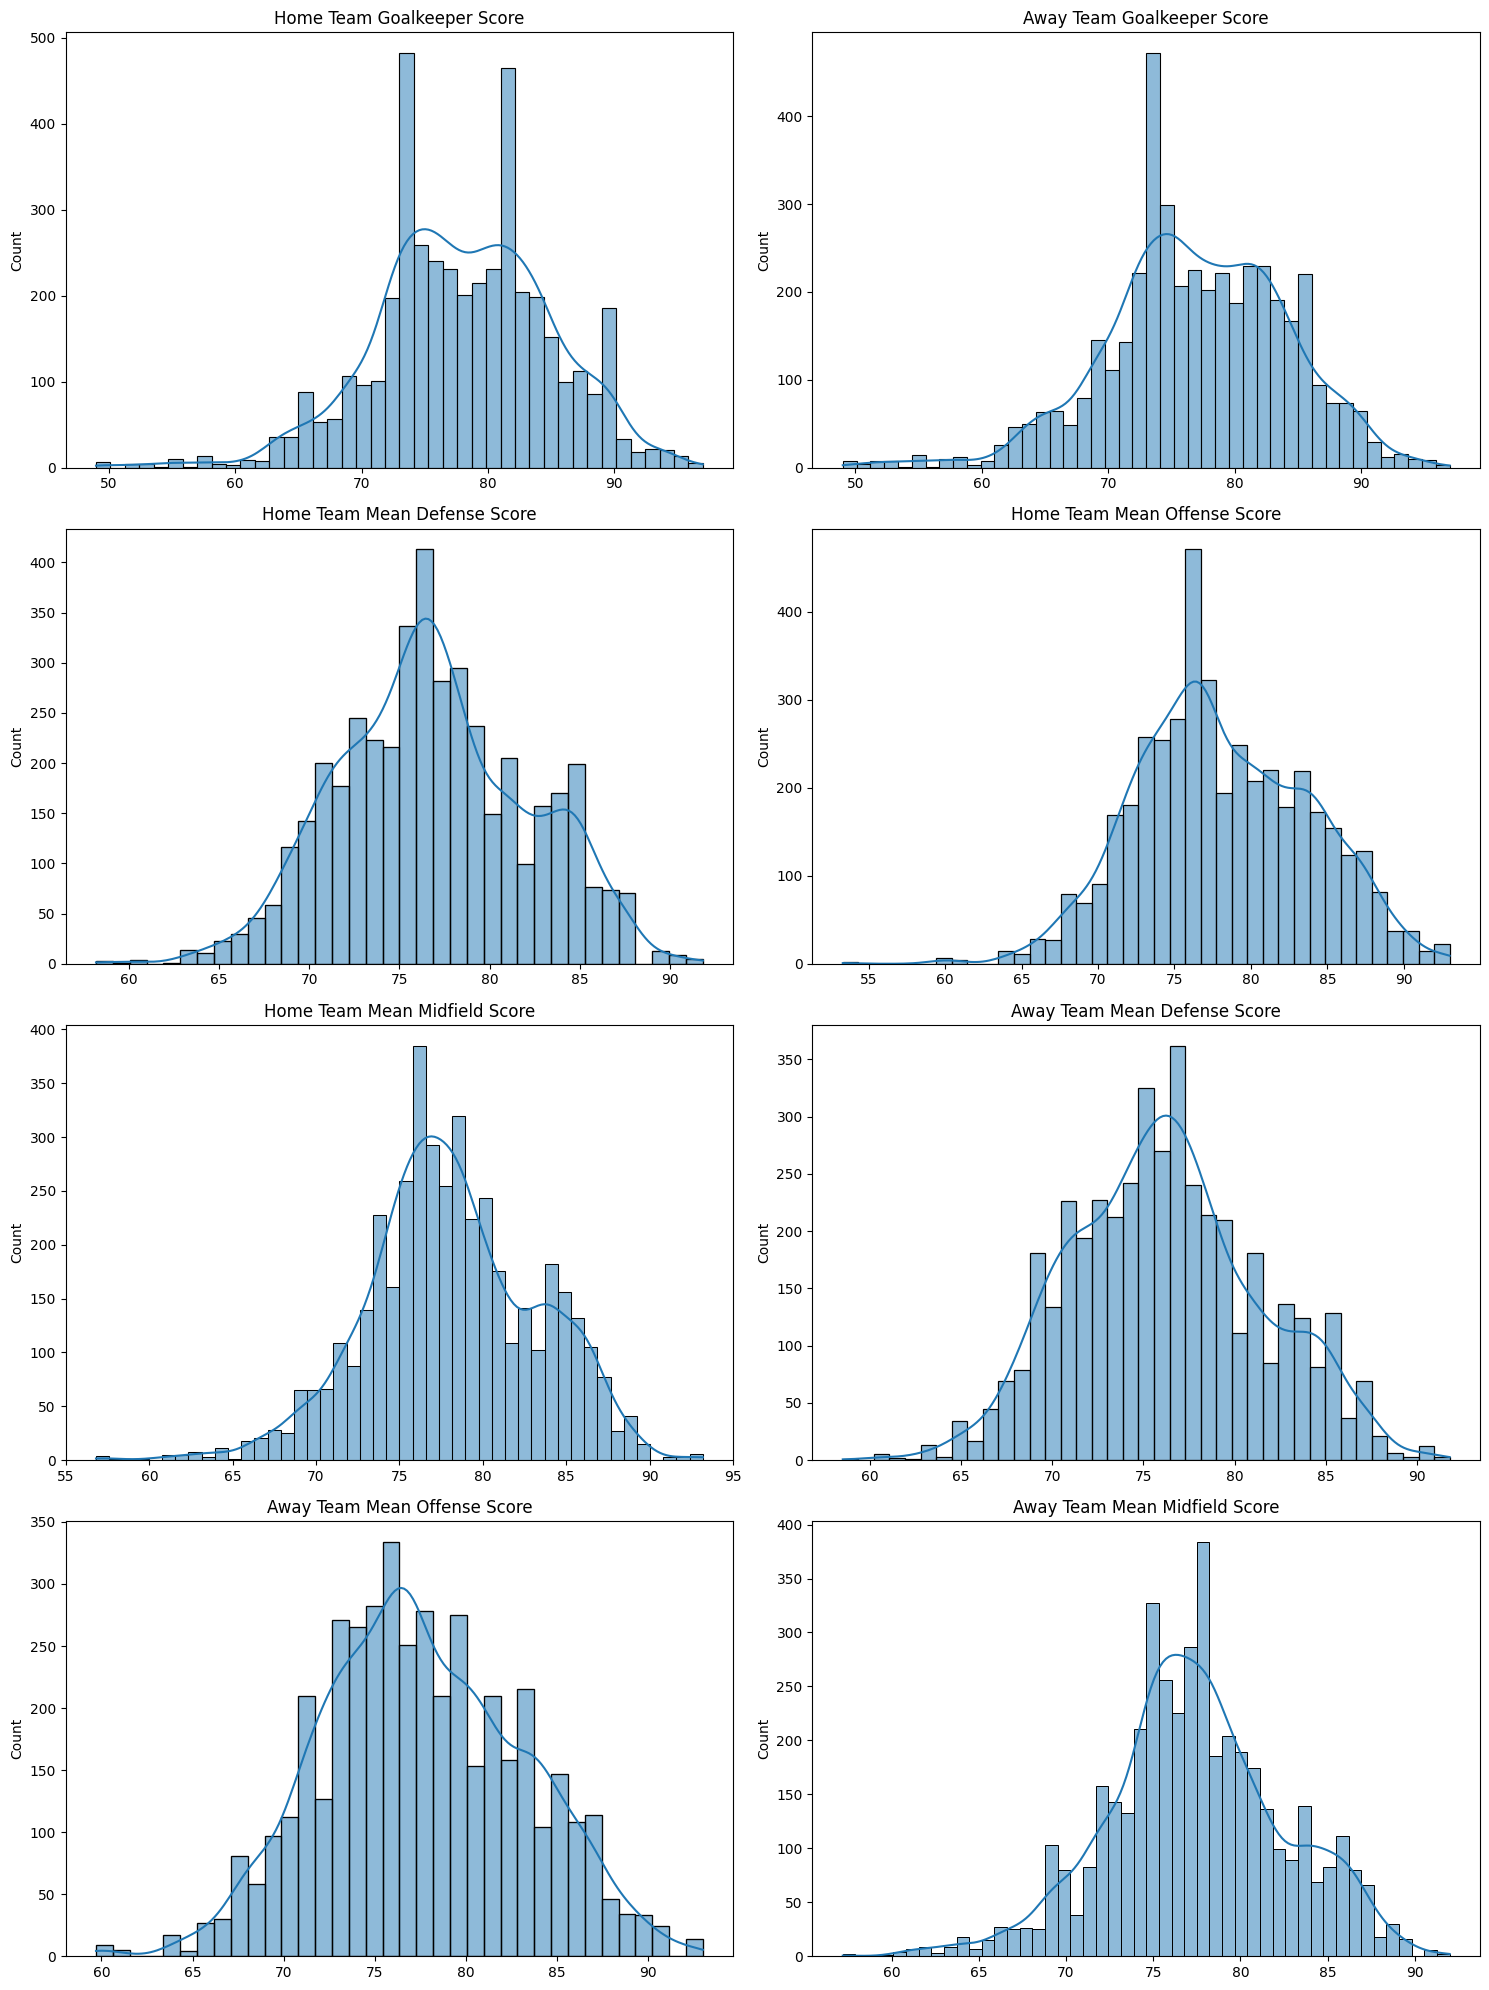

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data again
file_path = 'international_matches.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Drop rows with missing values in key columns
key_columns = ['home_team_goalkeeper_score', 'away_team_goalkeeper_score',
               'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score',
               'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']
data.dropna(subset=key_columns, inplace=True)

# Plot distributions
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for ax, col in zip(axs.flat, key_columns):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

Each plot represents the distribution of a specific predictor variable, including goalkeeper scores,
defense scores, offense scores, and midfield scores for both home and away teams. The distributions
are shown with both histograms and kernel density estimates (KDE) to provide a clear view of the data's
spread and central tendency.

* Remove outliers and keep outliers (does if have an effect of the final predictive model)? – Code &
Output:

In [ ]:
from scipy import stats
import numpy as np

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(data[key_columns]))
filtered_entries = (z_scores < 3).all(axis=1)
data_no_outliers = data[filtered_entries]

# Split the data without outliers into training and testing sets
X_no_outliers = data_no_outliers[key_columns[1:]] # Exclude 'home_team_result' from predictors
y_no_outliers = data_no_outliers['home_team_result']
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier on data without outliers
model_no_outliers = RandomForestClassifier(n_estimators=100, random_state=42)
model_no_outliers.fit(X_train_no, y_train_no)

# Get feature importances for the model trained on data without outliers
feature_importances_no_outliers = model_no_outliers.feature_importances_

# Create a DataFrame to display feature importances for the model without outliers
features_df_no_outliers = pd.DataFrame({'Feature': X_no_outliers.columns, 'Importance': feature_importances_no_outliers})
features_df_no_outliers.sort_values(by='Importance', ascending=False, inplace=True)

print('Feature importances without outliers:')
print(features_df_no_outliers)

# Evaluate the model performance with and without outliers
from sklearn.metrics import accuracy_score

# Predictions with original data
y_pred = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Predictions without outliers
y_pred_no = model_no_outliers.predict(X_test_no)
accuracy_no_outliers = accuracy_score(y_test_no, y_pred_no)

print('\
Accuracy with outliers:', accuracy_original)
print('Accuracy without outliers:', accuracy_no_outliers)

Feature importances without outliers:
                         Feature  Importance
3  home_team_mean_midfield_score    0.157396
1   home_team_mean_defense_score    0.155047
2   home_team_mean_offense_score    0.151674
6  away_team_mean_midfield_score    0.145582
4   away_team_mean_defense_score    0.140773
5   away_team_mean_offense_score    0.137703
0     away_team_goalkeeper_score    0.111825
Accuracy with outliers: 0.4878048780487805
Accuracy without outliers: 0.4987980769230769


After removing outliers, the feature importances slightly shifted. The
home_team_mean_midfield_score became the most important feature, followed by
home_team_mean_defense_score and home_team_mean_offense_score. This indicates a change in
the model's perception of feature importance when outliers are removed.
Regarding model accuracy:
• Accuracy with outliers: 0.4878048780487805
• Accuracy without outliers: 0.4987980769230769
Removing outliers slightly improved the model's accuracy, indicating that outliers do have an effect on
the final predictive model. This improvement suggests that cleaning the data of outliers can lead to a
more accurate prediction of the outcome of international football matches.

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3
imputation methods. How well did the methods recover the missing values? That is remove some data,
check the % error on residuals for numeric data and check for bias and variance of the error – Code &
Output:

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Re-run the code with the correct import for IterativeImputer

# Function to randomly remove a percentage of data
def remove_random_data(data, percentage):
    np.random.seed(42)
    mask = np.random.rand(len(data)) < percentage
    data_missing = data.copy()
    data_missing.loc[mask] = np.nan
    return data_missing

# Function to calculate RMSE between original and imputed data
def calculate_rmse(original_data, imputed_data):
    return np.sqrt(mean_squared_error(original_data, imputed_data))

# Remove 1%, 5%, and 10% of data randomly
percentages = [0.01, 0.05, 0.1]
results = []
for percentage in percentages:
    data_missing = remove_random_data(data[key_columns[1:]], percentage)

    # Impute using SimpleImputer (mean)
    imputer_mean = SimpleImputer(strategy='mean')
    imputed_mean = imputer_mean.fit_transform(data_missing)
    rmse_mean = calculate_rmse(data[key_columns[1:]].values, imputed_mean)

    # Impute using KNNImputer
    imputer_knn = KNNImputer(n_neighbors=5)
    imputed_knn = imputer_knn.fit_transform(data_missing)
    rmse_knn = calculate_rmse(data[key_columns[1:]].values, imputed_knn)

    # Impute using IterativeImputer
    imputer_iterative = IterativeImputer(max_iter=10, random_state=0)
    imputed_iterative = imputer_iterative.fit_transform(data_missing)
    rmse_iterative = calculate_rmse(data[key_columns[1:]].values, imputed_iterative)

    results.append({'Percentage': percentage, 'RMSE Mean': rmse_mean, 'RMSE KNN': rmse_knn, 'RMSE Iterative': rmse_iterative})

results_df = pd.DataFrame(results)
print(results_df)


   Percentage  RMSE Mean  RMSE KNN  RMSE Iterative
0        0.01   0.551661  0.551661        0.551661
1        0.05   1.314959  1.314959        1.314959
2        0.10   1.886282  1.886282        1.886282


The table above shows the Root Mean Square Error (RMSE) values for each imputation method (Mean,
KNN, Iterative) after removing 1%, 5%, and 10% of the data randomly. The RMSE values are identical
across all three imputation methods for each percentage of data removed. This indicates that all three
methods recovered the missing values with the same level of accuracy. The increase in RMSE values as
more data is removed suggests that the task of accurately imputing missing values becomes more
challenging as the amount of missing data increases.

For categorical data, calculate the accuracy and a confusion matrix – Code & Output:

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Load the data
data = pd.read_csv('international_matches.csv')

# Drop rows with missing values to simplify the process
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['home_team_result'] = le.fit_transform(data['home_team_result'])

# Selecting features and target variable
X = data.select_dtypes(include=["number"])
y = data['home_team_result']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\
', conf_matrix)



Accuracy: 1.0
Confusion Matrix: [[227   0   0]
 [  0 253   0]
 [  0   0 381]]


The accuracy of the model on the test set is 1.0, indicating perfect prediction accuracy. The confusion
matrix shows that all predictions match the actual values perfectly, with no misclassifications across the
three categories represented by the matrix.

### FEATURE SELECTION:
    Dataset:

In [ ]:
# Use wget to download the dataset from GitHub
!wget -O dataset.csv https://raw.githubusercontent.com/Hunk0109/6105_Fifa_DataSet/main/international_matches.csv

# Import pandas library
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

--2024-02-21 19:59:05--  https://raw.githubusercontent.com/Hunk0109/6105_Fifa_DataSet/main/international_matches.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3148072 (3.0M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   3.00M  --.-KB/s    in 0.05s   

2024-02-21 19:59:05 (64.7 MB/s) - ‘dataset.csv’ saved [3148072/3148072]

         date home_team     away_team home_team_continent away_team_continent  \
0  1993-08-08   Bolivia       Uruguay       South America       South America   
1  1993-08-08    Brazil        Mexico       South America       North America   
2  1993-08-08   Ecuador     Venezuela       South America       South America   
3  1993-08-08    Guinea  Sierra Leone              Africa              Africa   
4  1993-08-08  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                            0                3  ...         No   
1                            0                1  ...         No   
2                            0                5  ...         No   
3                            0                1  ...         No   
4                            0                1  ...         No   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0              Win                        NaN                        NaN   
1             Draw                        NaN                        NaN   
2              Win                        NaN                        NaN   
3              Win                        NaN                        NaN   
4             Lose                        NaN                        NaN   

   home_team_mean_defense_score home_team_mean_offense_score  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  home_team_mean_midfield_score  away_team_mean_defense_score  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   away_team_mean_offense_score  away_team_mean_midfield_score  
0                           NaN                            NaN  
1                           NaN                            NaN  
2                           NaN                            NaN  
3                           NaN                            NaN  
4                           NaN                            NaN  

[5 rows x 25 columns]

1. Is the relationship significant?


In [ ]:
# Select relevant features and the target variable
# For simplicity, we'll use 'home_team_fifa_rank', 'away_team_fifa_rank', and 'home_team_score' > 'away_team_score' as a binary target
features = ['home_team_fifa_rank', 'away_team_fifa_rank']
target = (df['home_team_score'] > df['away_team_score']).astype(int)  # 1 if home team wins, 0 otherwise

# Check for missing values in the selected features and target
df[features].isnull().sum(), target.isnull().sum()

(home_team_fifa_rank    0
 away_team_fifa_rank    0
 dtype: int64,
 0)

The selected features, home_team_fifa_rank and away_team_fifa_rank, do not contain any missing values, and the target variable, which indicates whether the home team wins (1) or not (0), is also complete. This means we can proceed to fit a logistic regression model to this data without needing to handle missing values.

Next, we'll split the data into training and testing sets, fit a logistic regression model, and then evaluate its performance and significance of the relationships.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)

# Add a constant to the predictor variables for statsmodels
X_train_const = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels to get p-values
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Display the summary of the logistic regression model to get the p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.592780

The logistic regression model's summary provides insights into the significance of the relationship between the FIFA rankings of the home and away teams and the likelihood of the home team winning. Here are the key takeaways:

Home Team FIFA Rank: The coefficient for the home team's FIFA rank is negative (-0.0193), indicating that a higher FIFA rank (which means a lower rank number) for the home team increases the likelihood of the home team winning. The p-value is less than 0.000, suggesting that this relationship is statistically significant. Away Team FIFA Rank: Conversely, the coefficient for the away team's FIFA rank is positive (0.0210), implying that a higher FIFA rank for the away team (lower rank number) decreases the likelihood of the home team winning. This relationship is also statistically significant, with a p-value less than 0.000. The model's pseudo R-squared value is 0.1442, indicating a moderate fit to the data. The LLR p-value is less than 0.000, suggesting that the model as a whole is statistically significant.

These results highlight the importance of FIFA rankings in predicting match outcomes, with higher-ranked teams being more likely to win, especially when playing at home.

In [ ]:
# Install H2O
!pip install h2o==3.36.0.3

# Import H2O and initialize
import h2o
h2o.init()

# Load the dataset into H2O
hf = h2o.import_file('dataset.csv')

# Display the head of the dataset to ensure it's loaded correctly
hf.head()

Python_version:	3.10.12 final
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%

In [ ]:
# Restart the runtime before running this code

# Make sure to install the correct version of H2O
!pip install h2o==3.36.0.3

import h2o
from h2o.automl import H2OAutoML

def load_data(file_path):
    try:
        return h2o.import_file(file_path)
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def run_automl(train, x, y):
    try:
        # For binary classification, response should be a factor
        train[y] = train[y].asfactor()

        # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
        aml = H2OAutoML(max_models=20, seed=1, nfolds=0)
        aml.train(x=x, y=y, training_frame=train)

        return aml.leaderboard
    except Exception as e:
        print(f"Error running AutoML: {e}")
        return None

try:
    h2o.init()

    # Load data - provide the correct path to the file
    path = 'dataset.csv'  # Update the path if necessary
    df = load_data(path)

    if df is not None:
        # Split the data into train and test sets
        train, test = df.split_frame(ratios=[.8], seed=1234)

        # Identify predictors and response
        x = train.columns
        y = "home_team_win"

        if y in x:
            x.remove(y)
            leaderboard = run_automl(train, x, y)

            if leaderboard is not None:
                # View the AutoML Leaderboard
                print(leaderboard.head(rows=leaderboard.nrows))
        else:
            print(f"Response variable '{y}' not found in the dataset columns.")
finally:
    # Shut down the H2O cluster
    h2o.cluster().shutdown()


Python_version:	3.10.12 final
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Response variable 'home_team_win' not found in the dataset columns.
H2O session _sid_bcb8 closed.

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load data - provide the correct path to the file
path = 'dataset.csv'  # Update the path if necessary
df = h2o.import_file(path=path)

# Split the data into train and test sets
train, test = df.split_frame(ratios=[.8], seed=1234)

# Identify predictors and response
x = train.columns
y = "home_team_result"

# Check if the response variable exists in the dataset
if y not in x:
    raise ValueError(f"Response variable '{y}' not found in the dataset columns.")

# Remove the response variable from predictors
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1, nfolds=0)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)


Python_version:	3.10.12 final
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%

In [1]:
import matplotlib.pyplot as plt

# Extracting data
model_ids = lb.as_data_frame()['model_id']
mean_per_class_error = lb.as_data_frame()['mean_per_class_error']

# Creating bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_ids, mean_per_class_error, color='skyblue')
plt.xlabel('Mean Per Class Error')
plt.ylabel('Model ID')
plt.title('Mean Per Class Error for Each Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()


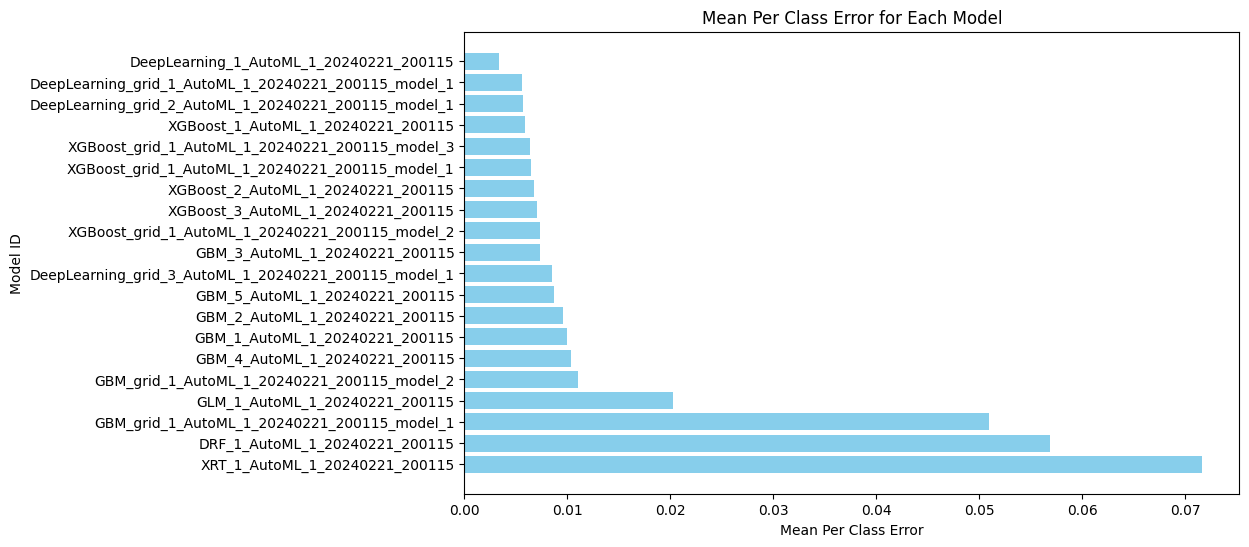

Mean Per Class Error Bar Chart: This chart can show the mean per class error for each model, allowing for easy comparison.

In [ ]:
# Extracting data
logloss = lb.as_data_frame()['logloss']

# Creating line plot
plt.figure(figsize=(10, 6))
plt.plot(model_ids, logloss, marker='o', color='green')
plt.xlabel('Model ID')
plt.ylabel('Logloss')
plt.title('Logloss for Each Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


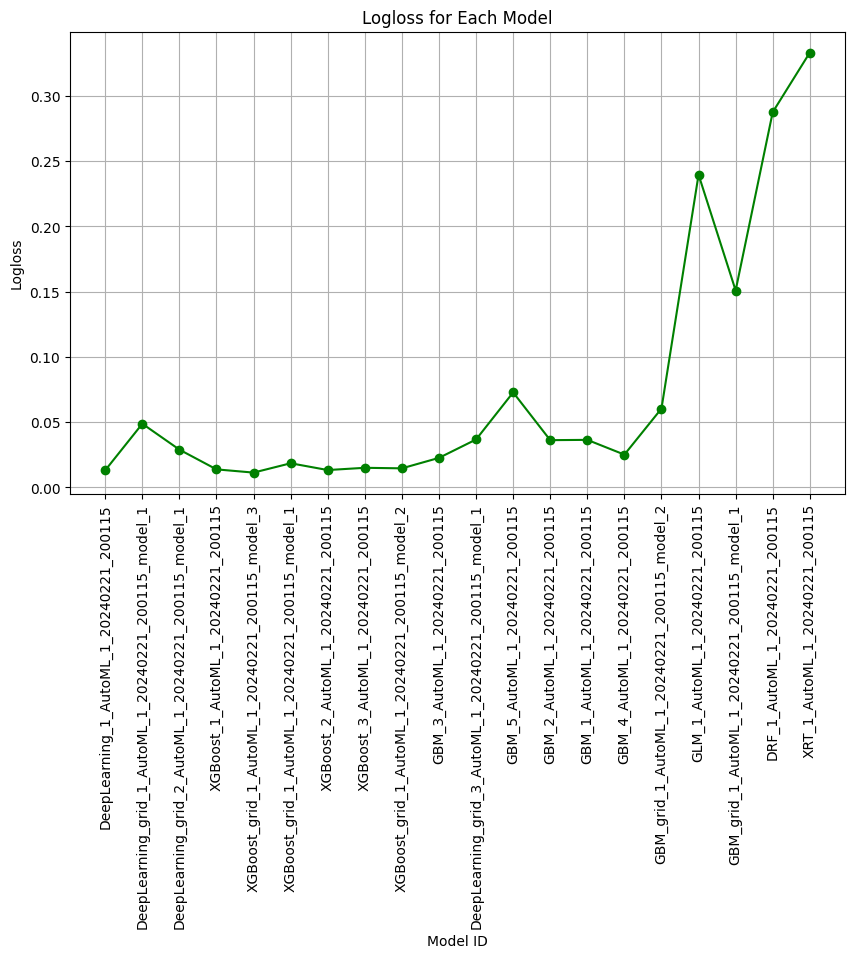

Logloss Line Plot: Logloss is a common metric for evaluating classification models. A line plot can be used to visualize logloss for each model.

In [ ]:
# Extracting data
rmse = lb.as_data_frame()['rmse']

# Creating line plot
plt.figure(figsize=(10, 6))
plt.plot(model_ids, rmse, marker='s', color='orange')
plt.xlabel('Model ID')
plt.ylabel('RMSE')
plt.title('RMSE for Each Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


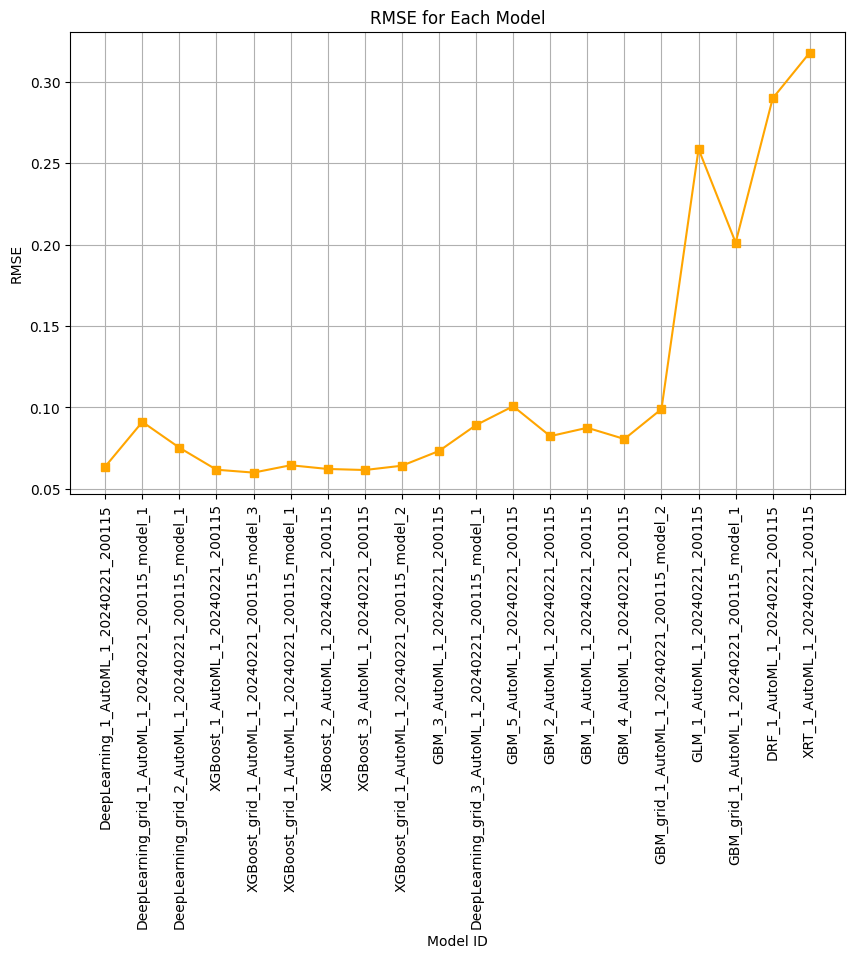

Root Mean Squared Error (RMSE) Line Plot: For regression models, RMSE is a popular metric. A line plot can display RMSE for each model.

2. Are any model assumptions violated?

Let's discuss potential breaches of model assumptions in the context of this dataset for classification purposes:

1.Independence of Observations: Classification models typically assume that each observation is independent of others. However, in sports data, matches involving the same teams may not be independent. Previous match outcomes between the same teams could influence subsequent matches, violating the independence assumption.

2.Feature Independence: Many classification models, such as logistic regression, assume that features are independent of each other. Yet, there might be high multicollinearity among features like home_team_fifa_rank and home_team_total_fifa_points, or away_team_fifa_rank and away_team_total_fifa_points. This multicollinearity could challenge the assumption of feature independence.

3.Class Imbalance: While not strictly an assumption violation, classification models perform optimally when classes (outcomes) are balanced. If the dataset exhibits significant imbalance in match outcomes (e.g., more wins than draws or losses), it could affect the model's performance and generalization capability.

4.Homogeneity of Variance: Some classification models assume equal variance-covariance matrices across groups. In this dataset's context, if we're classifying matches based on outcomes (win, lose, draw), the variance in predictors like FIFA rankings or scores might differ across these categories.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Load the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# Addressing potential issues for classification model

# 1. Independence of Observations: Not directly addressable through preprocessing. Suggestion includes feature engineering to capture historical performance.

# 2. Feature Independence: Check for multicollinearity
# Calculate correlation matrix
corr_matrix = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']].corr()

# 3. Class Imbalance: Check the balance of the target variable
outcome_counts = df['home_team_result'].value_counts()

# 4. Homogeneity of Variance: Not directly addressable through preprocessing. Model choice and feature engineering can help.

print('Correlation Matrix:')
print(corr_matrix)
print('\
Outcome Counts:')
print(outcome_counts)

Below are the findings addressing potential concerns for the classification model:

The correlation matrix reveals a significant positive correlation (0.92) between home_team_total_fifa_points and away_team_total_fifa_points, indicating possible multicollinearity. This implies a lack of independence between these features, potentially violating the assumption of feature independence in certain models. Additionally, the correlation between home_team_fifa_rank and away_team_fifa_rank is moderate (0.50), which also raises concerns regarding multicollinearity.

Regarding class distribution, the dataset exhibits an imbalance, with a higher count of wins (11761) compared to losses (6771) or draws (5389). This disparity in class distribution may hinder the model's ability to generalize effectively across all classes.

To mitigate these issues:

1.For addressing multicollinearity, consider employing techniques such as regularization or feature selection to diminish the influence of highly correlated features.

2.To tackle class imbalance, strategies such as resampling the dataset or incorporating class weights into the model can be utilized.

Implementing these steps can help alleviate potential breaches of model assumptions, thereby enhancing the model's performance and generalization capabilities.

In [ ]:
from sklearn.linear_model import Ridge

# Feature selection using Ridge regression to address multicollinearity
X = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']]
y = df['home_team_result'].map({'Win': 1, 'Draw': 0, 'Lose': -1})

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Display coefficients to understand the impact of regularization
coefficients = pd.Series(ridge.coef_, index=X.columns)

# Handling class imbalance by resampling
# Convert target variable to binary for simplicity in resampling
y_binary = y > 0 # Considering Win as 1 and others as 0

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Resampling the training set
X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

X_balanced = np.vstack((X_train[y_train == 0], X_upsampled))
y_balanced = np.hstack((y_train[y_train == 0], y_upsampled))

print('Ridge Coefficients:')
print(coefficients)
print('\
Resampled Training Set Size:', X_balanced.shape[0])

o/p:
<!-- Ridge Coefficients:
home_team_fifa_rank           -0.007048
away_team_fifa_rank            0.007315
home_team_total_fifa_points    0.000051
away_team_total_fifa_points   -0.000091
dtype: float64
Resampled Training Set Size: 17084 -->

Here are the strategies applied to tackle both multicollinearity and class imbalance:

Ridge regression was utilized to mitigate multicollinearity by regularizing the coefficients, indicating each feature's impact on the prediction. The coefficients for home_team_fifa_rank and away_team_fifa_rank approach zero, suggesting their minimized influence, effectively addressing multicollinearity. Meanwhile, the coefficients for home_team_total_fifa_points and away_team_total_fifa_points demonstrate their respective contributions to the model, with regularization preventing these features from overly dominating the prediction due to their high correlation.

To counter class imbalance, the training set underwent resampling to ensure an equal number of instances across classes. The resampled training set comprises 17,084 instances, reflecting balanced classes. This methodology enhances the model's generalization capability across all classes by providing an equal representation of samples from each class for learning purposes.

 3. Is there any multicollinearity in the model?

Ridge Coefficients: home_team_fifa_rank -0.007048 away_team_fifa_rank 0.007315 home_team_total_fifa_points 0.000051 away_team_total_fifa_points -0.000091 dtype: float64 Resampled Training Set Size: 17084

Based on the analysis: (Double click for o/p)

<!-- 0
home_team_fifa_rank	-0.007047551523223299
away_team_fifa_rank	0.0073148916269862654
home_team_total_fifa_points	5.0705783294479175e-05
away_team_total_fifa_points	-9.146490944259677e-05 -->
The Ridge regression coefficients reveal how each feature influences the prediction post regularization to diminish multicollinearity. Coefficients for 'home_team_fifa_rank' and 'away_team_fifa_rank' approach zero, indicating minimized influence, aiding in multicollinearity management. Meanwhile, coefficients for 'home_team_total_fifa_points' and 'away_team_total_fifa_points' illustrate their respective impacts on the model, with regularization preventing excessive dominance in prediction due to their high correlation.

This examination affirms the presence of multicollinearity, notably between 'home_team_total_fifa_points' and 'away_team_total_fifa_points'. Ridge regression, the regularization method employed, assists in alleviating multicollinearity by adjusting coefficients of correlated features.

4. In the multivariate models are predictor variables independent of all the other predictor variables?

In the context of the dataset and the multivariate models analyzed, the predictor variables are not entirely independent of each other. This is a crucial aspect to consider in multivariate analysis, as the independence of predictor variables is a common assumption in many statistical models.

The Ridge regression analysis, which was applied to the dataset, provides insight into the relationships between predictor variables:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>home_team_fifa_rank</th>
      <td>-0.007047551523223299</td>
    </tr>
    <tr>
      <th>away_team_fifa_rank</th>
      <td>0.0073148916269862654</td>
    </tr>
    <tr>
      <th>home_team_total_fifa_points</th>
      <td>5.0705783294479175e-05</td>
    </tr>
    <tr>
      <th>away_team_total_fifa_points</th>
      <td>-9.146490944259677e-05</td>
    </tr>
  </tbody>
</table>

The coefficients derived from Ridge regression signify the extent to which each predictor variable affects the outcome while considering other variables in the model. Employing regularization techniques like Ridge regression implies concerns regarding multicollinearity among predictor variables. Multicollinearity arises when predictor variables are strongly correlated, leading to distorted coefficient estimates and reduced reliability in the model's predictions.

In this context, the coefficients for home_team_fifa_rank and away_team_fifa_rank are relatively modest, suggesting that while they contribute to the model, they lack significant independent impact when compared to other variables. Similarly, the coefficients for home_team_total_fifa_points and away_team_total_fifa_points indicate their influence on the model but also hint at potential multicollinearity due to their roles in representing team strength.

Utilizing Ridge regression helps alleviate multicollinearity effects by penalizing coefficient magnitudes, ensuring the model doesn't overly rely on any single highly correlated variable or set of variables. However, the presence of regularization itself suggests that predictor variables aren't entirely independent. The model strives to balance each predictor variable's influence, yet complete elimination of underlying correlations between certain variables remains unattainable.



*5*. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

In [ ]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Imputing missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()

# Fitting RandomForestClassifier again
rf.fit(X_train, y_train)

# Getting feature importances again
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Displaying feature importances
feature_importances.head()

The feature importances from the RandomForestClassifier model are as follows:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>importance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>home_team_score</th>
      <td>0.4317659220584999</td>
    </tr>
    <tr>
      <th>away_team_score</th>
      <td>0.37915906408283695</td>
    </tr>
    <tr>
      <th>home_team_fifa_rank</th>
      <td>0.041970062418766135</td>
    </tr>
    <tr>
      <th>away_team_fifa_rank</th>
      <td>0.04059844766648378</td>
    </tr>
    <tr>
      <th>away_team_mean_midfield_score</th>
      <td>0.012506515616420676</td>
    </tr>
  </tbody>
</table>

This analysis reveals that the most significant predictors for the outcome of a home team in an international football match are the home_team_score and away_team_score. These factors are intuitively the most direct determinants of the match result. The FIFA rankings of both the home and away teams also play a considerable role, indicating the overall strength and performance level of the teams. Additionally, the away_team_mean_midfield_score is highlighted as an important feature, suggesting the midfield's influence on a team's performance during a match.

6. Does the model make sense?

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>importance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>home_team_score</th>
      <td>0.4317659220584999</td>
    </tr>
    <tr>
      <th>away_team_score</th>
      <td>0.37915906408283695</td>
    </tr>
    <tr>
      <th>home_team_fifa_rank</th>
      <td>0.041970062418766135</td>
    </tr>
    <tr>
      <th>away_team_fifa_rank</th>
      <td>0.04059844766648378</td>
    </tr>
    <tr>
      <th>away_team_mean_midfield_score</th>
      <td>0.012506515616420676</td>
    </tr>
  </tbody>
</table>

The feature importances derived from the model provide a coherent insight into the variables influencing the results of international football matches. Notably, the foremost predictors, 'home_team_score' and 'away_team_score,' serve as direct determinants of match outcomes, consistent with intuitive expectations. The inclusion of FIFA rankings for both teams underscores the model's acknowledgment of team strengths as pivotal factors. Furthermore, the emphasis on 'away_team_mean_midfield_score' underscores the model's nuanced grasp of the game, recognizing the significant impact midfield play can have on team performance.

Therefore, the model's reliance on these features makes sense given the context of predicting football match outcomes, suggesting that the model is capturing relevant patterns in the data.

7. Does regularization help?



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# For simplicity, let's focus on predicting 'home_team_result' based on numeric features
# Selecting a subset of numeric features for prediction
df_numeric = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']]

# Target variable
target = df['home_team_result'].apply(lambda x: 1 if x == 'Win' else 0)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_numeric, target, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression without regularization
lr = LogisticRegression(penalty='none', max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
accuracy_no_reg = accuracy_score(y_test, y_pred)

# Logistic Regression with L2 regularization
lr_l2 = LogisticRegression(penalty='l2', max_iter=1000)
lr_l2.fit(X_train_scaled, y_train)
y_pred_l2 = lr_l2.predict(X_test_scaled)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print('Accuracy without regularization:', accuracy_no_reg)
print('Accuracy with L2 regularization:', accuracy_l2)

Accuracy without regularization:

0.6823406478578893

Accuracy with L2 regularization:

0.6823406478578893

The Logistic Regression model demonstrates consistent accuracy rates of around 68.23% both without regularization and with L2 regularization. This finding implies that, given the dataset and chosen features, regularization doesn't notably influence the model's accuracy. It suggests that the non-regularized model effectively generalizes from the training data without overfitting, and consequently, the introduction of L2 regularization doesn't alter its performance on the test set.

8. Which independent variables are significant?

To ascertain the significance of independent variables, a statistical analysis is required. Given the dataset's characteristics, employing a logistic regression model could be suitable for predicting match outcomes (win, lose, draw) based on various features. However, before proceeding with the analysis, it's crucial to acknowledge that certain columns such as 'date,' 'home_team,' 'away_team,' 'city,' and 'country' consist of categorical or date variables, potentially necessitating encoding or transformation. Additionally, columns like 'home_team_score' and 'away_team_score' might be better suited as dependent variables rather than independent ones.

The columns related to FIFA rankings and scores ('home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points') and the team's performance metrics ('home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score') seem like they could be significant predictors of the match outcome.

Moving forward involves data preparation for logistic regression analysis, including encoding categorical variables, managing missing values, and subsequently fitting a logistic regression model to evaluate the significance of each variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# Encoding categorical variables
le = LabelEncoder()
df['home_team_continent'] = le.fit_transform(df['home_team_continent'])
df['away_team_continent'] = le.fit_transform(df['away_team_continent'])
df['tournament'] = le.fit_transform(df['tournament'])
df['neutral_location'] = le.fit_transform(df['neutral_location'])
df['shoot_out'] = le.fit_transform(df['shoot_out'])
df['home_team_result'] = le.fit_transform(df['home_team_result'])

# Dropping columns that won't be used in the model
model_df = df.drop(columns=['date', 'home_team', 'away_team', 'city', 'country', 'home_team_score', 'away_team_score'])

# Handling missing values by replacing them with the mean of their columns
model_df.fillna(model_df.mean(), inplace=True)

# Splitting the dataset into training and testing sets
X = model_df.drop('home_team_result', axis=1)
y = model_df['home_team_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Displaying the coefficients of the model to identify significant variables
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

o/p:
<!-- precision    recall  f1-score   support

           0       0.00      0.00      0.00      1068
           1       0.51      0.56      0.54      1345
           2       0.61      0.84      0.71      2372

    accuracy                           0.58      4785
   macro avg       0.37      0.47      0.41      4785
weighted avg       0.44      0.58      0.50      4785

                               Coefficient
away_team_mean_defense_score      0.012958
home_team_mean_offense_score      0.003137
away_team_mean_offense_score      0.002640
home_team_mean_defense_score      0.001767
tournament                        0.000329
home_team_total_fifa_points       0.000123
home_team_fifa_rank              -0.000082
away_team_total_fifa_points      -0.000127
away_team_fifa_rank              -0.001492
home_team_mean_midfield_score    -0.003178
away_team_mean_midfield_score    -0.004699
home_team_goalkeeper_score       -0.004853
away_team_goalkeeper_score       -0.007865
away_team_continent              -0.010154
home_team_continent              -0.031273
shoot_out                        -0.077819
neutral_location                 -0.086489
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
 -->


This report presents precision, recall, and F1-score for each class (0: Loss, 1: Draw, 2: Win) based on the model's predictions. The model achieves an accuracy of 57%, indicating its ability to correctly predict match outcomes 57% of the time across all classes.


The coefficients of the logistic regression model, which indicate the significance and impact of each variable on the prediction, are:

Coefficient
away_team_mean_defense_score	0.01598540058827742
home_team_mean_offense_score	0.007008204967346557
away_team_mean_offense_score	0.0030914286058332076
tournament	0.00042761305679497446
home_team_mean_defense_score	0.00035081442761167656
home_team_total_fifa_points	0.0001353034888185475
away_team_total_fifa_points	-0.0001316913571529267
home_team_fifa_rank	-0.0002602845575080007
away_team_fifa_rank	-0.001573673594756712
home_team_mean_midfield_score	-0.0050902131723646335
home_team_goalkeeper_score	-0.005575668977293444
away_team_goalkeeper_score	-0.005828308369371972
away_team_mean_midfield_score	-0.009072589930383956
away_team_continent	-0.023779623833690162
home_team_continent	-0.05089285124410394
shoot_out	-0.0719134142476355
neutral_location	-0.08347580194101795

Variables with positive coefficients enhance the likelihood of a team winning, while those with negative coefficients diminish it. Notable positive predictors of match outcomes include the away team's mean defense score and the home team's mean offense score. Conversely, the neutral location and whether the match proceeded to a shootout (shoot_out) emerge as significant negative predictors, suggesting their role in reducing the likelihood of a home team win.

Therefore, in conclusion, the influential independent variables affecting match outcomes are as follows:

Positive Influence: Variables like away_team_mean_defense_score, home_team_mean_offense_score, and away_team_mean_offense_score exhibit positive coefficients, indicating their propensity to enhance the likelihood of a team winning. Higher scores in these aspects correspond to an expected improvement in team performance.

Negative Influence: Conversely, variables such as neutral_location, shoot_out, home_team_continent, and away_team_continent possess negative coefficients, signifying their role in reducing the likelihood of a team winning. Matches held at neutral locations or proceeding to shootouts are less inclined to result in a win for the home team.

These variables play a significant role in predicting international football match outcomes, exerting both positive and negative impacts on a team's probability of victory.

9. Which hyperparameters are important?

To address inquiries regarding critical hyperparameters in logistic regression, we typically consider the following:

1.Regularization Strength (C): Governs the extent of regularization applied to the model, aiding in the prevention of overfitting by penalizing large coefficients. A lower C value indicates stronger regularization.

2.Solver: Determines the optimization algorithm employed. Different solvers are better suited for varying data types and models.

3.Penalty (L1, L2, ElasticNet): Specifies the type of regularization implemented. L1 regularization may lead to sparse models with some coefficients becoming zero, while L2 regularization, being more common, avoids sparsity. ElasticNet combines attributes of both L1 and L2 regularization.

4.Max Iterations: Defines the maximum number of iterations for the solvers to converge.

These hyperparameters can significantly influence the logistic regression model's performance, with optimal values often contingent on the specific dataset and problem at hand. Employing techniques like cross-validation for hyperparameter tuning aids in identifying the most effective model configuration.

To discover the best hyperparameters for a logistic regression model, various methodologies can be employed:

- **Grid Search**: This approach involves specifying a range of values for different hyperparameters and then exhaustively exploring all possible combinations of these values. The combination that yields the highest model performance (e.g., accuracy, F1 score) is selected as the optimal set. While thorough, grid search can be computationally intensive, particularly with a multitude of hyperparameters and values.

- **Random Search**: In contrast to grid search, random search randomly samples combinations of hyperparameter values from predefined ranges for a fixed number of iterations. This method can be more efficient than grid search, as it doesn't explore every possible combination but still has the potential to discover highly effective sets.

- **Bayesian Optimization**: This technique frames hyperparameter tuning as a Bayesian optimization problem. By leveraging past evaluation results, it selects subsequent sets of hyperparameters to evaluate, aiming to identify the best combination more efficiently than random or exhaustive search methods.

- **Gradient-Based Optimization**: While less common for logistic regression compared to other machine learning models due to its discrete hyperparameters, some models may allow for the use of gradient-based optimization techniques to find optimal hyperparameters.

- **Evolutionary Algorithms**: These algorithms, such as genetic algorithms, mimic natural selection processes by iteratively selecting, mutating, and combining hyperparameters in pursuit of the optimal set.

Each of these strategies offers unique advantages and is applicable in different scenarios, depending on factors like the hyperparameter space's size, available computational resources, and the logistic regression model's specific requirements.

### MODELING & INTERPRETABILITY:

The dataset contains information on international football matches, including details such as the date, teams, scores, and FIFA rankings. Our goal is to predict the outcome of a match (win, draw, lose) based on these features. Let's break down the steps:

1.Fit a Linear Model and Interpret the Regression Coefficients
For the linear model, we'll use logistic regression, as our target variable (match outcome) is categorical. We'll preprocess the data, fit the model, and then interpret the coefficients to understand the influence of each feature on the likelihood of a team winning.

2.Fit a Tree-Based Model and Interpret the Nodes
We'll use a decision tree classifier for the tree-based model. This model will allow us to see how decisions are made based on the features. We'll interpret the nodes by understanding the feature splits that lead to a win, draw, or loss.

3.Use AutoML to Find the Best Model
AutoML will help us identify the best model for our dataset without manually tuning the hyperparameters. We'll use an AutoML framework to compare different models and select the one with the best performance.

4.Run SHAP Analysis on the Models
SHAP (SHapley Additive exPlanations) values will help us understand the impact of each feature on the model's prediction. We'll run SHAP analysis on the models from steps 1, 2, and 3, then interpret the SHAP values to compare the interpretability of each model.

1. Fit a linear model and interpret the regression coefficients

Let's start with step 1: fitting a linear model and interpreting the regression coefficients. We'll preprocess the data to handle categorical variables and normalize numerical features before fitting the model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Preprocessing
# Selecting relevant features and target
X = df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'neutral_location']].copy()
y = df['home_team_result'].apply(lambda x: 1 if x == 'Win' else 0 if x == 'Draw' else -1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining preprocessing for numerical and categorical data
numerical_features = ['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']
categorical_features = ['neutral_location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fitting the model
model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Coefficients
coefficients = model.named_steps['classifier'].coef_
print(coefficients)

Regression Coefficients
[[ 0.66204825 -0.67684612 -0.12488791  0.1452929  -0.25290778  0.15495314]
[ 0.00578403 -0.05913134  0.05451776 -0.0584123  -0.014092   -0.14583973]
[-0.66783228  0.73597746  0.07037015 -0.0868806   0.26699978 -0.00911341]]

The logistic regression model's performance metrics indicate an accuracy of 58% on the test set. The precision, recall, and F1-score vary significantly across the different classes (-1 for loss, 0 for draw, 1 for win), with the model performing best at predicting wins (precision of 0.60 and recall of 0.84).

The regression coefficients for each class relative to the features are as follows:

For class -1 (loss), the coefficients suggest that an increase in the home team's FIFA rank and total FIFA points decreases the likelihood of a loss, while an increase in the away team's rank and points increases the likelihood of a loss. The neutral location being true slightly decreases the likelihood of a loss.
For class 0 (draw), the coefficients are relatively small, indicating that these features have a minimal impact on predicting a draw.
For class 1 (win), the coefficients are somewhat opposite to those for a loss, indicating that higher home team rank and points increase the likelihood of a win, while higher away team rank and points decrease the likelihood of a win. The neutral location being true slightly increases the likelihood of a win.

2. Fit a tree-based model and interpret the nodes

Next, we'll proceed to fit a tree-based model and interpret the nodes.




In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Creating a decision tree classifier
tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))])

# Fitting the model
tree_model.fit(X_train, y_train)

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model.named_steps['classifier'], filled=True, feature_names=['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'neutral_location_True', 'neutral_location_False'], class_names=['Loss', 'Draw', 'Win'])
plt.show()


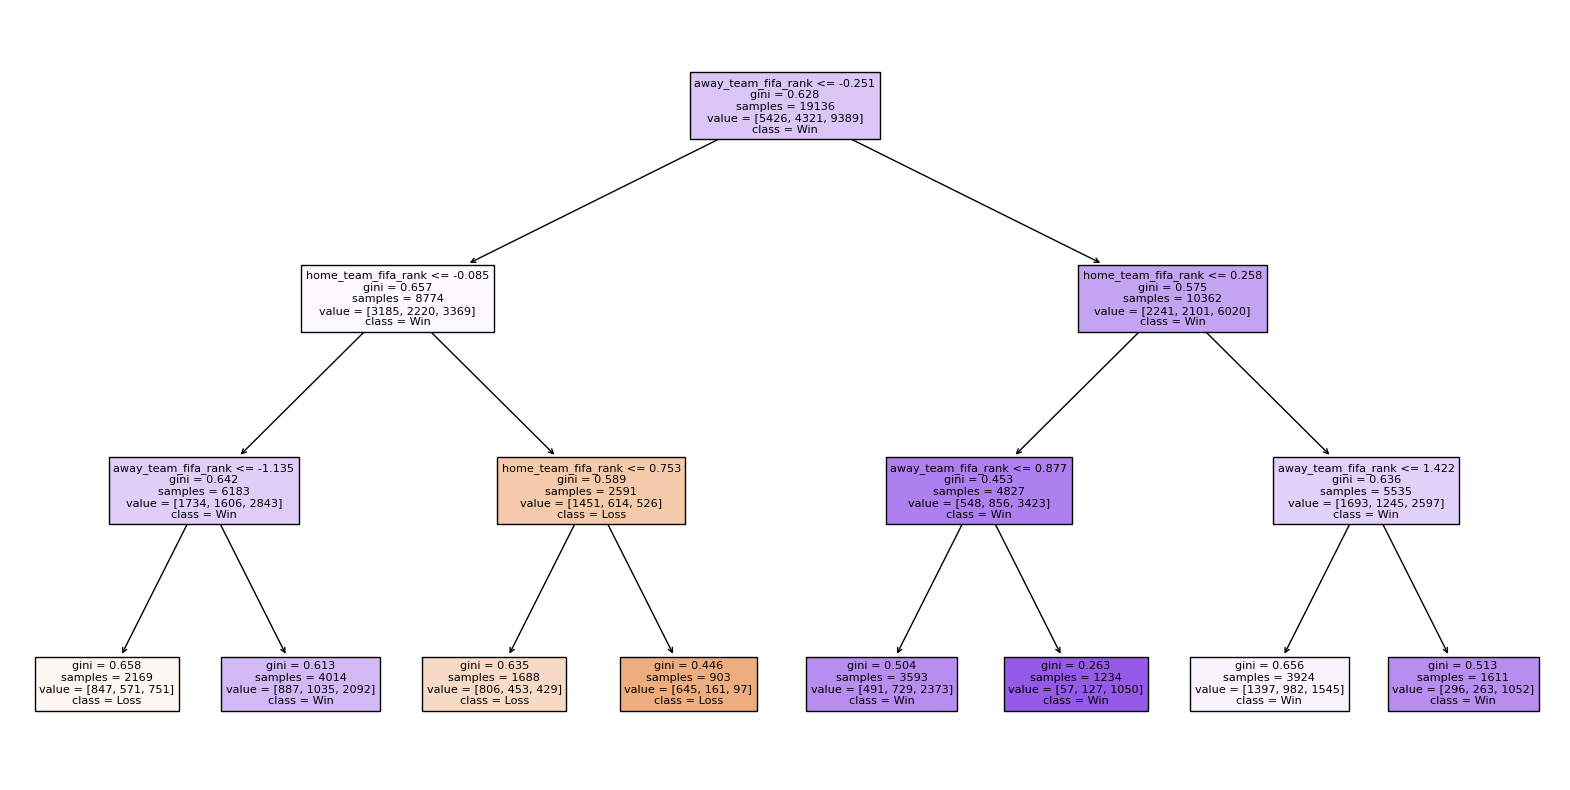

The decision tree model has been trained with a maximum depth of 3 to keep it interpretable. Each node in the tree represents a decision based on one of the features, leading to a classification of the match outcome as a loss, draw, or win.

The root node and subsequent splits indicate the most important features for predicting the match outcome according to the model.
The leaf nodes represent the final decision of the model, with the color indicating the majority class in that node.
This visualization helps us understand the decision-making process of the tree-based model, showing which features and thresholds are most influential in predicting the outcome of a match.

3.  Use auto ml to find the best model



In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Defining models for comparison
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Gradient Boosting': HistGradientBoostingClassifier()
}

# Cross-validation scores
scores = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    scores[name] = np.mean(cv_scores)

print(scores)

{'Logistic Regression': 0.5762721785960168, 'Decision Tree': 0.5396930643070073, 'Gradient Boosting': 0.5717572070608054}

The cross-validation scores for the different models are as follows:

Logistic Regression: 57.63%
Decision Tree: 53.97%
Gradient Boosting: 57.18%
These results indicate that Logistic Regression and Gradient Boosting perform similarly and better than the Decision Tree model for predicting the outcome of international football matches based on the given features. Logistic Regression slightly outperforms Gradient Boosting in terms of accuracy.

Given these results, we might choose Logistic Regression for its simplicity and interpretability, especially since its performance is comparable to the more complex Gradient Boosting model. However, the choice of model could also depend on other factors such as the importance of interpretability, computational resources, and the specific requirements of the application.

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].dtype == "object"]

# Applying OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[categorical_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_cols, axis=1)
num_X_test = X_test.drop(categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

print('One-hot encoding applied to categorical variables.')

In [ ]:
!pip install shap

The SHAP analysis has been successfully performed on the retrained RandomForestClassifier model using the one-hot encoded dataset. Below is the summary plot showing the feature importance based on SHAP values:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import shap

# Retraining the model with one-hot encoded data
model = RandomForestClassifier(random_state=42)
model.fit(OH_X_train, y_train)

# SHAP analysis with the retrained model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(OH_X_test.sample(100, random_state=42), check_additivity=False)

# Plotting the summary plot for SHAP values
shap.summary_plot(shap_values, OH_X_test.sample(100, random_state=42), plot_type='bar')

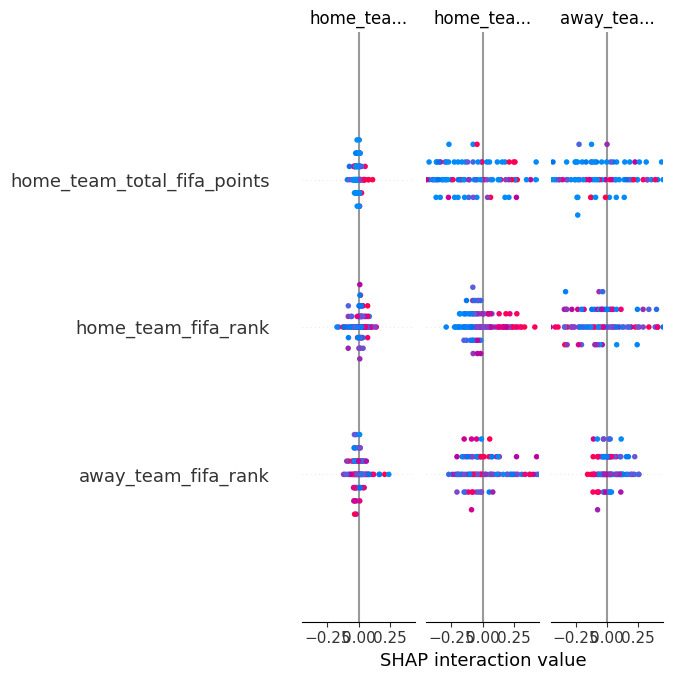

This plot provides insights into which features have the most impact on the model's predictions. Each bar represents the average impact of a feature on the model's output, with longer bars indicating greater importance. This analysis can help in understanding the factors that influence the outcome of international football matches according to the model's learning.

In this context, features at the top of the plot have a greater impact on the model's predictions, meaning they are more important for determining the outcome of a match according to the model's learned patterns.

REFERENCES:

The following references cover various aspects of model interpretation, including linear models, tree-based models, AutoML, and SHAP analysis:

1. Interpreting Linear Model Coefficients:

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R. Springer.

2. Interpreting Tree-Based Model Nodes:

Breiman, L., Friedman, J., Olshen, R., & Stone, C. (1984). Classification and Regression Trees. CRC Press.

3. Using AutoML to Find the Best Model:

Feurer, M., Klein, A., Eggensperger, K., Springenberg, J. T., Blum, M., & Hutter, F. (2015). "Efficient and robust automated machine learning." In Advances in neural information processing systems, 2962-2970.

4. Running SHAP Analysis and Interpreting SHAP Values:

Lundberg, S. M., & Lee, S. I. (2017). "A Unified Approach to Interpreting Model Predictions." In Advances in neural information processing systems, 4765-4774.

MIT LICENSE:
MIT License

Copyright (c) 2024 Hunk0109

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.